In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
# Get the feature names
feature_names = [x.capitalize() for x in data.feature_names]
# Get the class names
class_names = [x.capitalize() for x in data.target_names]

In [ ]:
class_names

['Malignant', 'Benign']

In [ ]:
# Get the feature data (X)
X = data.data
target = data.target
# Convert feature data to a pandas DataFrame
data = pd.DataFrame(X, columns=feature_names)
target = pd.DataFrame(target)

In [ ]:
#print first 5 data
data.head()

,Mean radius,Mean texture,Mean perimeter,Mean area,Mean smoothness,Mean compactness,Mean concavity,Mean concave points,Mean symmetry,Mean fractal dimension,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Create the decision tree classifier object
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
#split data
x_train,x_test,y_train,y_test=train_test_split(data, target, test_size = 0.33, random_state = 0)

In [ ]:
# Concatenate the features and target labels for training data
training_data = pd.concat([x_train,y_train],axis = 1)
# Concatenate the features and target labels for testing data
testing_data = pd.concat([x_test,y_test],axis = 1)

In [ ]:
# Train the decision tree classifier
train=classifier.fit(x_train, y_train)
# Predict the target labels for the testing data using the trained classifier
Pred=classifier.predict(x_test)
print("prediction",Pred)

prediction [0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1]


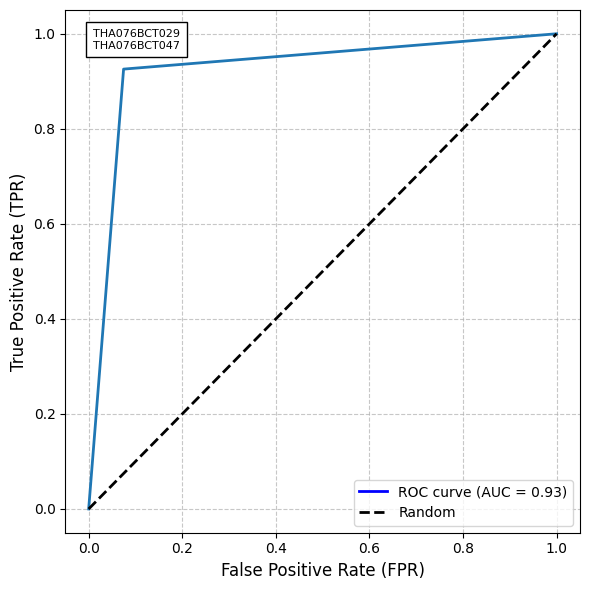

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# Compute the probabilities of the positive class (class 1)
probs = classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calculate the AUC-ROC
auc_roc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc), linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# Create separate legend handles and labels
legend_handles = [
    plt.Line2D([], [], color='blue', linewidth=2),
    plt.Line2D([], [], color='black', linestyle='--', linewidth=2)
]
legend_labels = ['ROC curve (AUC = {:.2f})'.format(auc_roc), 'Random']

# Display separate legend boxes
plt.legend(handles=legend_handles, labels=legend_labels, loc='lower right', fontsize=10)
labels = ['THA076BCT029', 'THA076BCT047']
combined_label = '\n'.join(labels)
plt.text(0.01, 0.98 + 0.03, combined_label, verticalalignment='top', horizontalalignment='left', fontsize=8,
         bbox=dict(facecolor='white', edgecolor='black', pad=5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

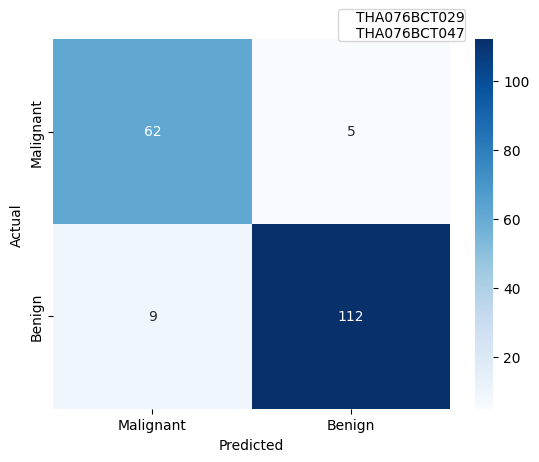

In [ ]:
# Generate the confusion matrix
conf = confusion_matrix(y_test, Pred)
# Set the colormap for the heatmap
cmap = 'Blues'
# Create a heatmap of the confusion matrix
sns.heatmap(conf, annot=True,cmap=cmap, xticklabels=class_names, yticklabels=class_names,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show

In [ ]:
import numpy as np

target_names = ['malignant', 'benign']
report = classification_report(y_test, Pred, target_names=target_names)

# Format precision, recall, and f1-score values to two decimal places
report = report.replace('avg / total', 'avg/total')
report = report.replace('\n\n', '\n')

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support
   malignant       0.87      0.93      0.90        67
      benign       0.96      0.93      0.94       121
    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188



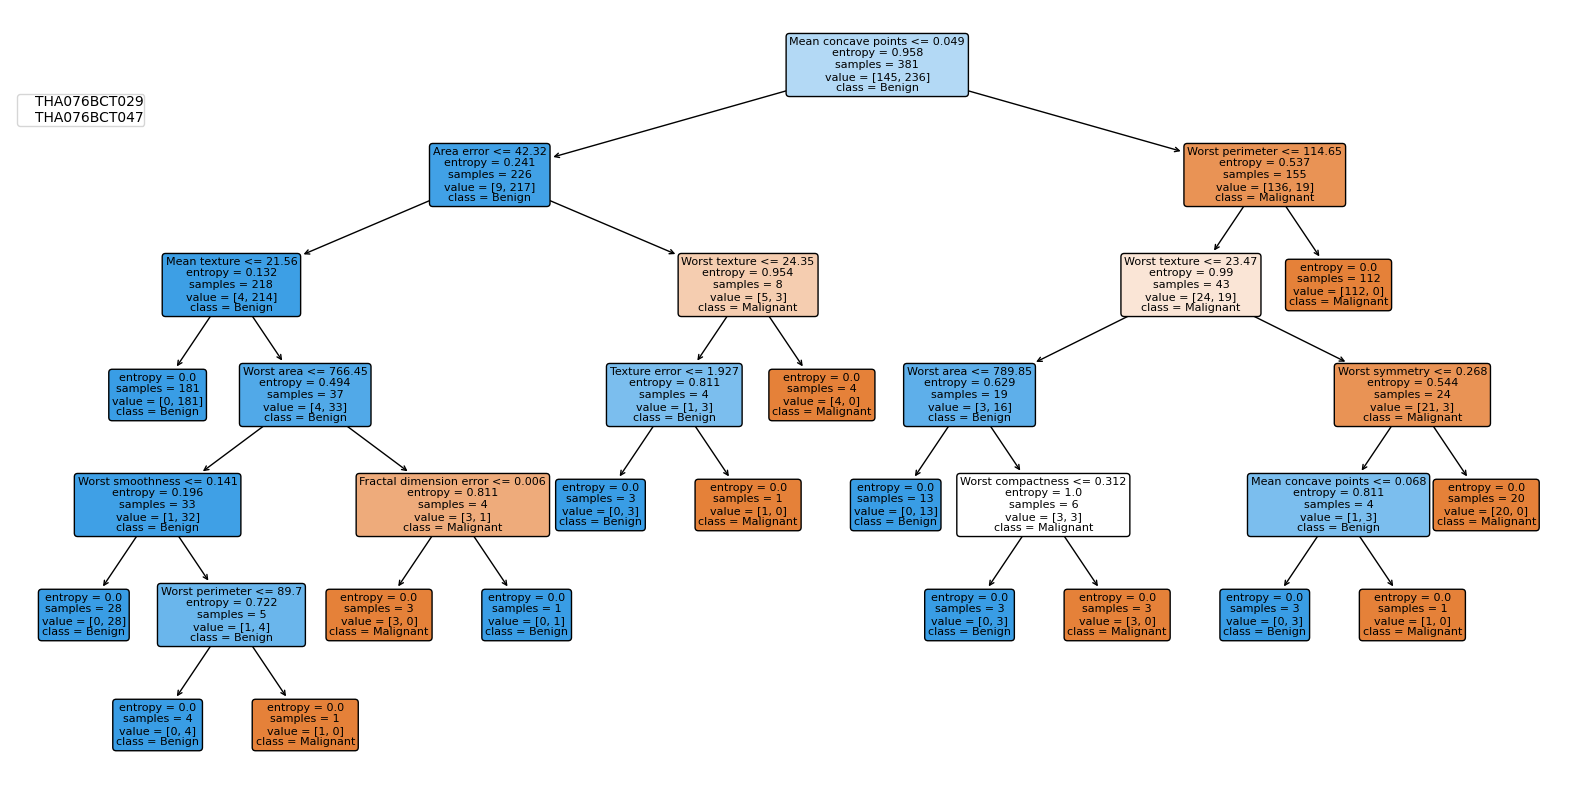

In [ ]:

fig, ax = plt.subplots(figsize=(20, 10))
# Plot the decision tree with custom styling
tree.plot_tree(train, ax=ax, filled=True, rounded=True, feature_names=feature_names, class_names=class_names, fontsize=8)
# Customize the plot aesthetics
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Breast Cancer Class", fontsize=14)
# Adjust the arrow properties
for arrow in ax.get_xticklines():
  arrow.set_markersize(5)
# Adjust the spacing between subplots if needed
plt.subplots_adjust(wspace=0.5, hspace=0.5)
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
# Display the plot
plt.show()


In [ ]:
#For max depth = 3
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth = 3)
train=classifier.fit(x_train, y_train)
train=classifier.fit(x_train, y_train)
Pred=classifier.predict(x_test)
print("prediction",Pred)

prediction [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1]


<function matplotlib.pyplot.show(close=None, block=None)>

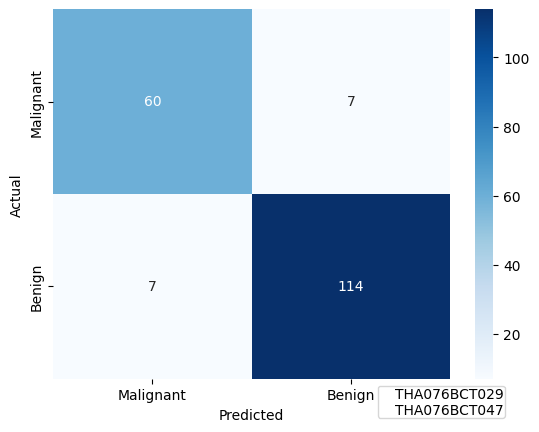

In [ ]:
conf = confusion_matrix(y_test, Pred)
cmap = 'Blues'
sns.heatmap(conf, annot=True,cmap=cmap,fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.8, 0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show

In [ ]:
import numpy as np

target_names = ['malignant', 'benign']
report = classification_report(y_test, Pred, target_names=target_names)

# Format precision, recall, and f1-score values to two decimal places
report = report.replace('avg / total', 'avg/total')
report = report.replace('\n\n', '\n')

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support
   malignant       0.90      0.90      0.90        67
      benign       0.94      0.94      0.94       121
    accuracy                           0.93       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



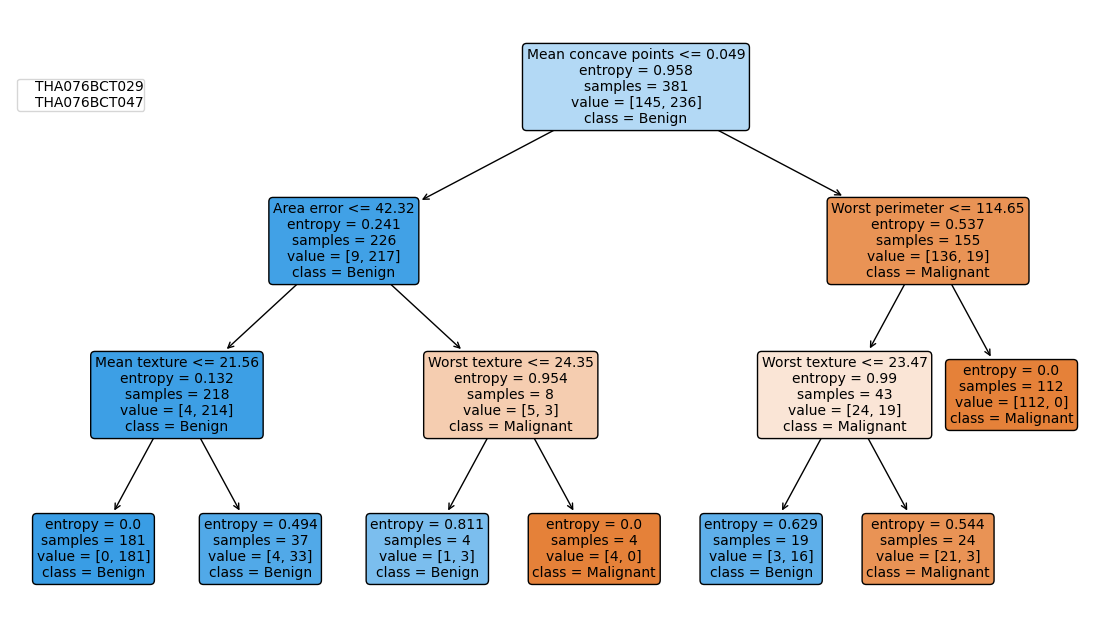

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
# Plot the decision tree with custom styling
tree.plot_tree(train, ax=ax, filled=True, rounded=True, feature_names=feature_names, class_names=class_names, fontsize=10)
# Customize the plot aesthetics
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Breast Cancer Class", fontsize=14)
# Adjust the arrow properties
for arrow in ax.get_xticklines():
  arrow.set_markersize(5)
# Adjust the spacing between subplots if needed
plt.subplots_adjust(wspace=0.5, hspace=0.5)
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
# Display the plot
plt.show()

In [ ]:
#For max depth 2
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth = 2)
train=classifier.fit(x_train, y_train)


In [ ]:
train=classifier.fit(x_train, y_train)
Pred=classifier.predict(x_test)
print("prediction",Pred)

prediction [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1]


<function matplotlib.pyplot.show(close=None, block=None)>

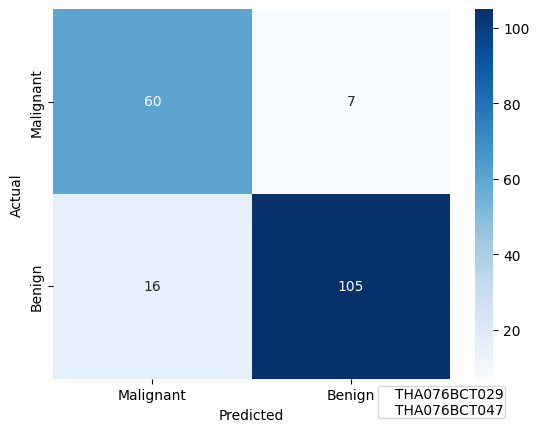

In [ ]:
conf = confusion_matrix(y_test, Pred)
cmap = 'Blues'
sns.heatmap(conf, annot=True,cmap=cmap, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.8, 0), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show

In [ ]:
import numpy as np

target_names = ['malignant', 'benign']
report = classification_report(y_test, Pred, target_names=target_names)

# Format precision, recall, and f1-score values to two decimal places
report = report.replace('avg / total', 'avg/total')
report = report.replace('\n\n', '\n')

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support
   malignant       0.79      0.90      0.84        67
      benign       0.94      0.87      0.90       121
    accuracy                           0.88       188
   macro avg       0.86      0.88      0.87       188
weighted avg       0.88      0.88      0.88       188



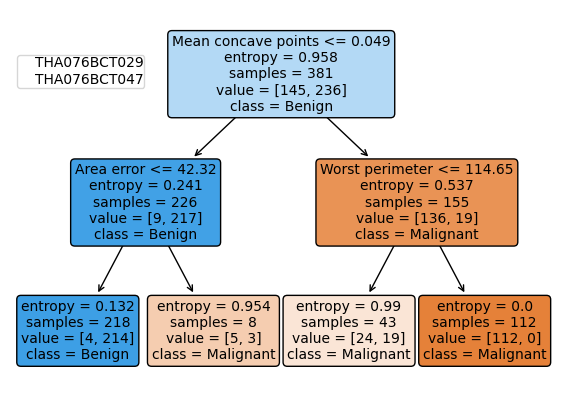

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
# Plot the decision tree with custom styling
tree.plot_tree(train, ax=ax, filled=True, rounded=True, feature_names=feature_names, class_names=class_names, fontsize=10)
# Customize the plot aesthetics
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Breast Cancer Class", fontsize=14)
# Adjust the arrow properties
for arrow in ax.get_xticklines():
  arrow.set_markersize(5)
# Adjust the spacing between subplots if needed
plt.subplots_adjust(wspace=0.5, hspace=0.5)
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0, 0.9), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
# Display the plot
plt.show()

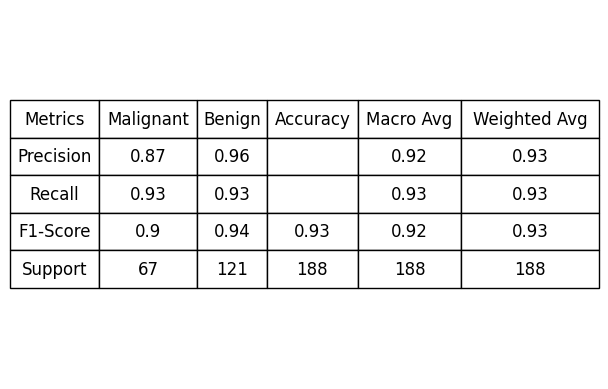

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the classification report
data = {
    'Class': ['Metrics','Malignant', 'Benign', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Precision': ['Precision',0.87, 0.96, None, 0.92, 0.93],
    'Recall': ['Recall',0.93, 0.93, None, 0.93, 0.93],
    'F1-Score': ['F1-Score',0.90, 0.94, 0.93, 0.92, 0.93],
    'Support': ['Support',67, 121, 188, 188, 188]
}

# Create the table
table_data = []
for row in data.values():
    table_data.append(row)

fig, ax = plt.subplots()

ax.axis('off')
table = ax.table(cellText=table_data,  cellLoc='center', loc='center')

# Format the cell properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Adjust the cell heights
table.auto_set_column_width(col=list(range(len(data['Class']))))
table.scale(1, 1.5)

# Display the table
plt.show()




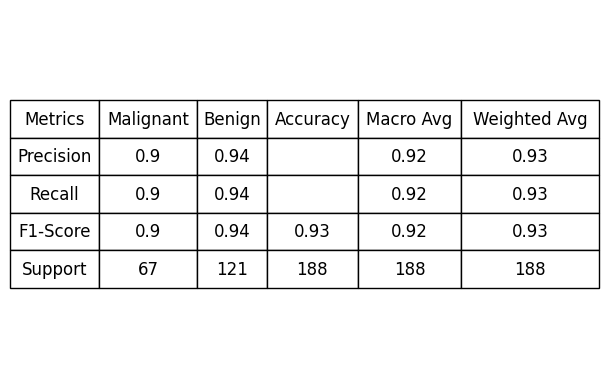

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the classification report
data = {
    'Class': ['Metrics','Malignant', 'Benign', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Precision': ['Precision',0.90, 0.94, None, 0.92, 0.93],
    'Recall': ['Recall',0.90, 0.94, None, 0.92, 0.93],
    'F1-Score': ['F1-Score',0.90, 0.94, 0.93, 0.92, 0.93],
    'Support': ['Support',67, 121, 188, 188, 188]
}

# Create the table
table_data = []
for row in data.values():
    table_data.append(row)

fig, ax = plt.subplots()

ax.axis('off')
table = ax.table(cellText=table_data,  cellLoc='center', loc='center')

# Format the cell properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Adjust the cell heights
table.auto_set_column_width(col=list(range(len(data['Class']))))
table.scale(1, 1.5)

# Display the table
plt.show()


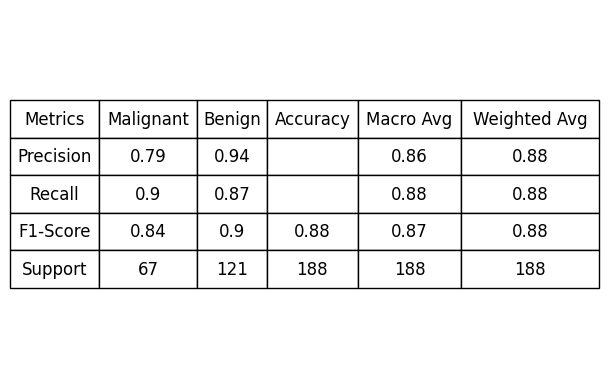

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the classification report
data = {
    'Class': ['Metrics', 'Malignant', 'Benign', 'Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Precision': ['Precision', 0.79, 0.94, None, 0.86, 0.88],
    'Recall': ['Recall', 0.90, 0.87, None, 0.88, 0.88],
    'F1-Score': ['F1-Score', 0.84, 0.90, 0.88, 0.87, 0.88],
    'Support': ['Support', 67, 121, 188, 188, 188]
}

# Create the table
table_data = []
for row in data.values():
    table_data.append(row)

fig, ax = plt.subplots()

ax.axis('off')
table = ax.table(cellText=table_data,  cellLoc='center', loc='center')

# Format the cell properties
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Adjust the cell heights
table.auto_set_column_width(col=list(range(len(data['Class']))))
table.scale(1, 1.5)

# Display the table
plt.show()
